In [1]:
import numpy as np 
from scipy.special import iv
import matplotlib.pyplot as plt 
import scipy.integrate as integrate
from tqdm import tqdm
from math import erf, erfc
from scipy.optimize import *
import os 


In [19]:
amps=np.linspace(0,3,100)
ind=len(amps)

channels = {}
channels[1] = [[.5,.5],[.01,1]]
channels[2] = [[.5,.5],[.9, 1.]]
channels[3] = [[.5,.5],[.5, .55]]
channels[4] = [[.5,.5],[.001, 1.]]
channels[5] = [[.5,.5],[.00001, 1.]]
channels[6] = [[.5,.5],[.000001, 1.]]
channels[7] = [[.5,.5],[.5, .9]]
channels[8] = [[.5,.5],[.3, .4]]
channels[9] = [[.5,.5],[.3, .5]]



for caseid in range(1,2):
    print("\033[1m CASE{}:".format(caseid))
    print("attenuations: ",channels[caseid][1])
    

    s2=np.load("data_cases/{}/ar_2L_s.npy".format(caseid))[1:]
    fun2=np.load("data_cases/{}/ar_2L_betas.npy".format(caseid))#,fun2)
    s1=np.load("data_cases/{}/ar_1L_s.npy".format(caseid))#,s1)[1:]
    fun1=np.load("data_cases/{}/ar_1L_betas.npy".format(caseid))#,fun1)
    homodynes_values=np.load("data_cases/{}/homodynes.npy".format(caseid))[1:]#,homodynes_values)
    helstroms_values=np.load("data_cases/{}/helstroms.npy".format(caseid))[1:]#,helstroms_values)



 CASE1:
attenuations:  [0.01, 1]


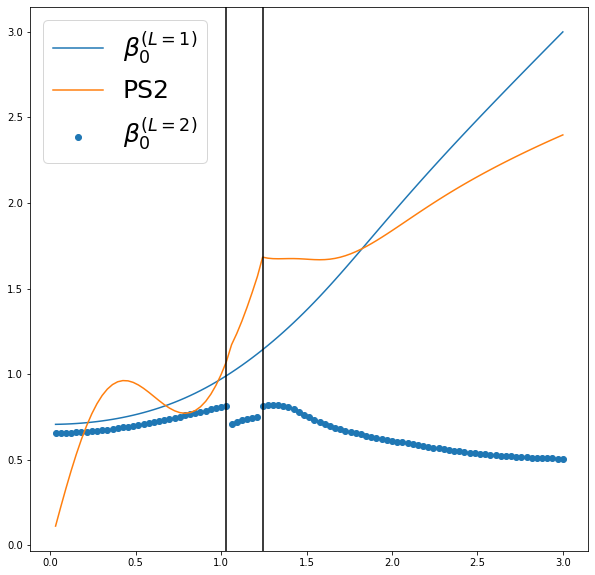

In [64]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
ax.plot(amps[1:],np.abs(fun1[1:]), label=r'$\beta^{(L=1)}_0$')
ax.scatter(amps[1:],np.abs(fun2[1:][:,0]), label=r'$\beta^{(L=2)}_0$')
ax.plot(amps[1:], 80*(helstroms_values-s2), label="PS2")
ax.axvline(amps[34],color="black")
ax.axvline(amps[41],color="black")
ax.legend(prop={"size":25})

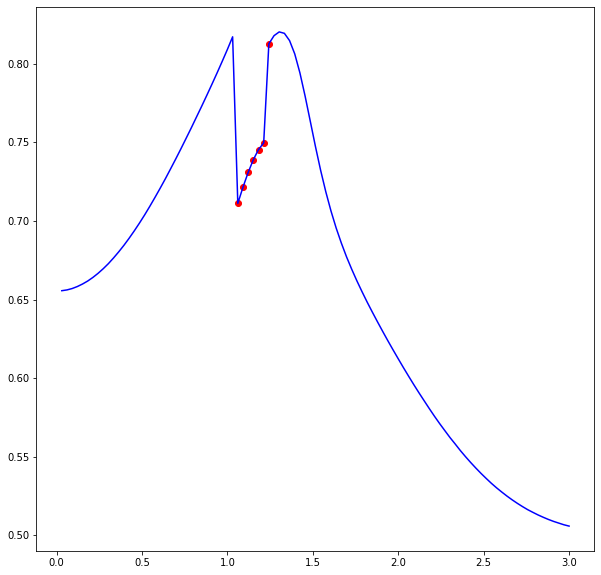

In [72]:
plt.figure(figsize=(10,10))
ind1 = 34
ind2=41
ax=plt.subplot2grid((1,1),(0,0))
ax.plot(amps[1:], np.abs(fun2[1:][:,0]), color="blue")
ax.scatter(amps[1:][ind1:ind2], np.abs(fun2[1:][:,0][ind1:ind2]), color="red")

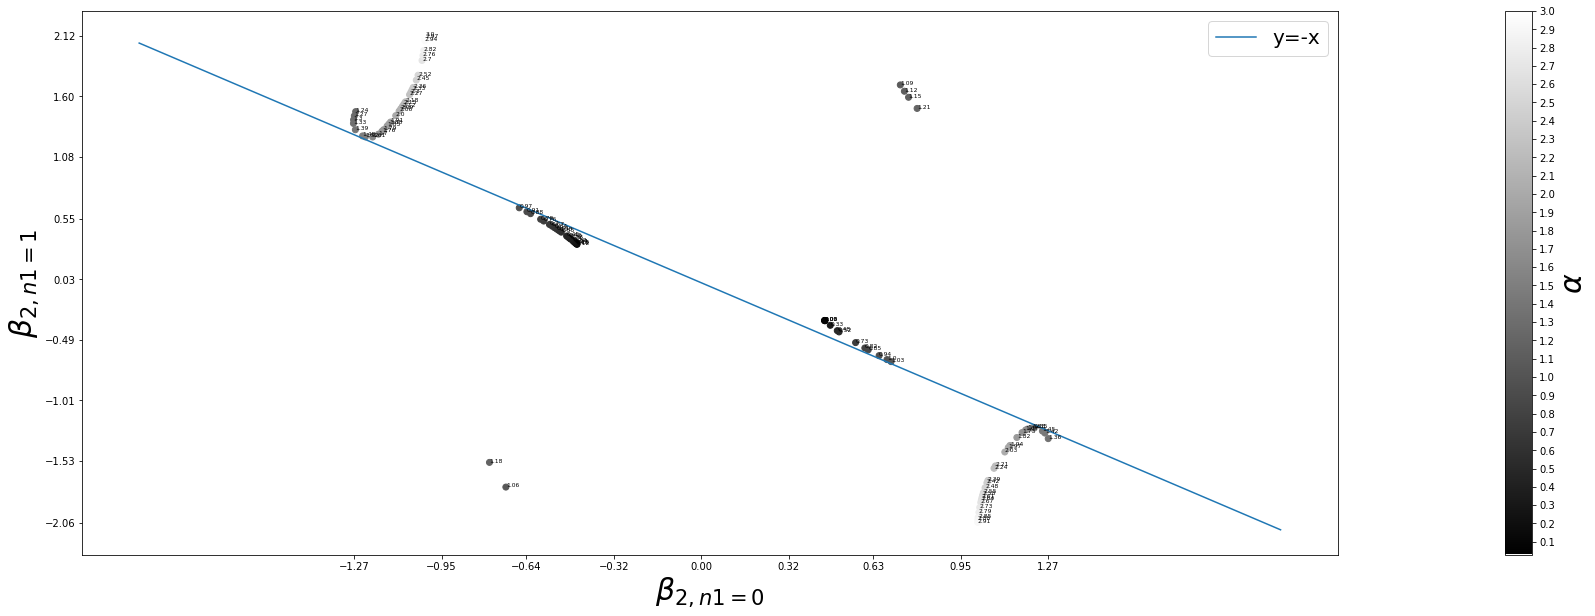

In [54]:
x = np.linspace(min(fun2[:,2]), max(fun2[:,2]),100)
fig2=plt.figure(figsize=(30,10))
im=plt.scatter(fun2[:,1],fun2[:,2], c=amps,cmap="gray")#, '.',label="L=2")
cb=fig2.colorbar(im,label=r'$\alpha$',pad=0.1, ticks=list(np.arange(0,3.1,0.1)))

#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  

cb.set_label(label=r'$\alpha$',size=30, weight='bold')

plt.plot(x,-x, label="y=-x")
plt.xlabel(r'$\beta_{2,n1=0}$',size=30)
plt.ylabel(r'$\beta_{2,n1=1}$',size=30)
xticks = np.round(np.linspace(min(fun2[:,1]), max(fun2[:,1]), int(len(fun2[:,2])/10)),2)
yticks = np.round(np.linspace(min(fun2[:,2]), max(fun2[:,2]), int(len(fun2[:,2])/10)),2)

plt.xticks(xticks, size=10)
plt.yticks(yticks, size=10)

for ind, anot in enumerate(amps):
    plt.annotate(str(np.round(anot,2)),np.array((fun2[:,1][ind], fun2[:,2][ind]) ), size=6)
plt.legend(prop={"size":20})
plt.savefig("paper_plots/strategy.pdf")

In [26]:
xticks

array([-2.0571658 , -2.01452922, -1.97189264, -1.92925606, -1.88661949,
       -1.84398291, -1.80134633, -1.75870975, -1.71607318, -1.6734366 ,
       -1.63080002, -1.58816344, -1.54552687, -1.50289029, -1.46025371,
       -1.41761713, -1.37498055, -1.33234398, -1.2897074 , -1.24707082,
       -1.20443424, -1.16179767, -1.11916109, -1.07652451, -1.03388793,
       -0.99125136, -0.94861478, -0.9059782 , -0.86334162, -0.82070505,
       -0.77806847, -0.73543189, -0.69279531, -0.65015874, -0.60752216,
       -0.56488558, -0.522249  , -0.47961243, -0.43697585, -0.39433927,
       -0.35170269, -0.30906612, -0.26642954, -0.22379296, -0.18115638,
       -0.13851981, -0.09588323, -0.05324665, -0.01061007,  0.0320265 ,
        0.07466308,  0.11729966,  0.15993624,  0.20257281,  0.24520939,
        0.28784597,  0.33048255,  0.37311913,  0.4157557 ,  0.45839228,
        0.50102886,  0.54366544,  0.58630201,  0.62893859,  0.67157517,
        0.71421175,  0.75684832,  0.7994849 ,  0.84212148,  0.88